# DICOM images in Python: An overview

## Introduction

DICOM or Digital Imaging and Communications in medicine are image files sourced from different modalities, e.g., CT or MRI scans, and based on an [international standard](https://www.dicomstandard.org/) to transmit, store, retrieve, print, process, and display medical imaging information. DICOM files does not only contain the image, but also additional data, such as patient identifier, date of birth, age, sex, and any other useful information about the diagnosis. Several DICOM viewers are available online (a list is available [here](https://technologyadvice.com/blog/healthcare/5-dicom-viewers/)), but Python can be very helpful in case additional processing is required. 

## Pre-requisites

First, the following libraries are needed to import and open DICOM files in Python:

- **[Pydicom](https://pypi.org/project/pydicom/)**: DICOM files reading and decoding library
- **[Numpy](https://numpy.org/install/)**: Array manipulation library
- **[Pillow](https://pypi.org/project/Pillow/2.2.2/)**: Image processing library
- **[Matplotlib](https://matplotlib.org/stable/users/installing/index.html)**: Image visualization library

These libraries can be easily installed via the command:

```bash
pip install pydicom numpy pillow matplotlib
```

## Data structure

A DICOM file can be read via the [`dcmread()`](https://pydicom.github.io/pydicom/stable/reference/generated/pydicom.filereader.dcmread.html#pydicom.filereader.dcmread) method, which returns a [`FileDataset`](https://pydicom.github.io/pydicom/stable/reference/generated/pydicom.dataset.FileDataset.html#pydicom.dataset.FileDataset) instance. The `FileDataset` represents an extension of [`Dataset`](https://pydicom.github.io/pydicom/stable/reference/generated/pydicom.dataset.Dataset.html#pydicom.dataset.Dataset) class to make reading and writing to file-like easier and  wraps a dictionary of DICOM [`DataElement`](https://pydicom.github.io/pydicom/stable/reference/generated/pydicom.dataelem.DataElement.html#pydicom.dataelem.DataElement) instances:

In [1]:
from pydicom import dcmread

DICOM_PATH = '/home/user/Desktop/exam/MD44PKO2/T2T5OLJX/I7600000'
ds = dcmread(DICOM_PATH)
type(ds)

pydicom.dataset.FileDataset

A `DataElement` is then composed of the following parts:

- a `tag` that identifies the attribute, usually in the format (XXXX,XXXX) with hexadecimal numbers, and may be divided further into DICOM Group Number and DICOM Element Number;
- a `Value Representation (VR)` that describes the data type and format of the attribute value.
- a `Value Multiplicity (VM)` that is automatically determined from the contents of the value.
- a `value` which can be one of:
    - a regular numeric, string or text value as an int, float, str, bytes, etc
    - a list of regular values (if `VM`>1)
    - a [`Sequence`](https://pydicom.github.io/pydicom/stable/reference/generated/pydicom.sequence.Sequence.html#pydicom.sequence.Sequence) instance, where a `Sequence` is a list of `Dataset` instances, where each Dataset contains DataElement instances, and so on...

You can display the entire dataset by simply printing its string (str or repr) value:

In [2]:
# TO BE COMMENTED
ds.remove_private_tags()
ds.PatientName = 'ROSSI^MARIO'
ds.PatientID = '99999999'
ds.PatientBirthDate = '19330101'
ds.PatientAge = '090Y'
ds.PatientAddress = 'XXXXXXXXXX'
ds.InstitutionName = 'XXXXXXXXXX'
ds.InstitutionAddress = 'XXXXXXXXXX'

In [3]:
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 168
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.1.4.55050.30000022121515300815600002074
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.840.113704.7.0.2
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'OTHER', 'CSA MPR', 'CSAPARALLEL', 'AXIAL', 'CT_SOM5 SEQ']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.4.55050.30000022121515300815600002074
(0008, 0020) Study Date                          DA: '20221215'
(0008, 0021) Series Date                         DA: '20221215'
(0

You can access specific elements by their DICOM keyword or tag number. When using the tag number directly a `DataElement` instance is returned, so `DataElement.value` must be used to get the value.

> **_NOTE:_**  Some attributes values have been redacted or replace by fake values for privacy.

In [4]:
ds.PatientName

'ROSSI^MARIO'

In [5]:
ds[0x10,0x10].value

'ROSSI^MARIO'

If you don’t remember or know the exact element tag or keyword, Dataset provides a handy Dataset.dir() method, useful during interactive sessions at the Python prompt. It will return any non-private element keywords in the dataset that have the specified string anywhere in the keyword (case insensitive).

In [6]:
ds.dir('pat')

['DistanceSourceToPatient',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'IssuerOfPatientID',
 'PatientAddress',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientPosition',
 'PatientSex']

Calling `Dataset.dir()` without passing it an argument will return a list of all non-private element keywords in the dataset:

In [7]:
ds.dir()

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionNumber',
 'AcquisitionTime',
 'AdmittingDiagnosesDescription',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConfidentialityCode',
 'ContentDate',
 'ContentTime',
 'ConvolutionKernel',
 'DateOfLastCalibration',
 'DerivationDescription',
 'DeviceSerialNumber',
 'DistanceSourceToDetector',
 'DistanceSourceToPatient',
 'FilterType',
 'FocalSpots',
 'FrameOfReferenceUID',
 'GantryDetectorTilt',
 'GeneratorPower',
 'HighBit',
 'IconImageSequence',
 'ImageComments',
 'ImageFrameOrigin',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'InstanceNumber',
 'InstitutionAddress',
 'InstitutionName',
 'IssuerOfPatientID',
 'KVP',
 'LossyImageCompression',
 'Manufacturer',
 'ManufacturerModelName',
 'ModalitiesInStudy',
 'Modality',
 'NumberOfFramesInOverlay',
 'NumberOfStudyRelatedInstances',
 'OperatorsName',
 'OverlayBitPosition',
 'OverlayBitsAllocated',
 'OverlayColumns',
 'OverlayData',
 'OverlayDesc

> **_NOTE:_**  You can also view DICOM files in a collapsible tree using the example program [dcm_qt_tree.py](https://github.com/pydicom/contrib-pydicom/blob/master/plotting-visualization/dcm_qt_tree.py).

## Image visualization

DICOM images pixel data is stored as raw bytes in the `DataElement` associated to the `PixelData` tag. `PixelData` is often not immediately useful as data may be stored in a variety of different ways:

- The pixel values may be signed or unsigned integers, or floats
- There may be multiple image frames
- There may be multiple planes per frame (i.e. RGB) and the order of the pixels may be different
- The image data may be encoded using one of the available compression standards (1.2.840.10008.1.2.4.50 JPEG Baseline, 1.2.840.10008.1.2.5 RLE Lossless, etc). Encoded image data will also be encapsulated and each encapsulated image frame may be broken up into one or more fragments.

Because of the complexity in interpreting the pixel data, pydicom provides an easy way to get it in a convenient form: [`Dataset.pixel_array`](https://pydicom.github.io/pydicom/stable/reference/generated/pydicom.dataset.Dataset.html#pydicom.dataset.Dataset.pixel_array). As an example, if the pixel data is compressed then `pixel_array` will directly return the uncompressed data.

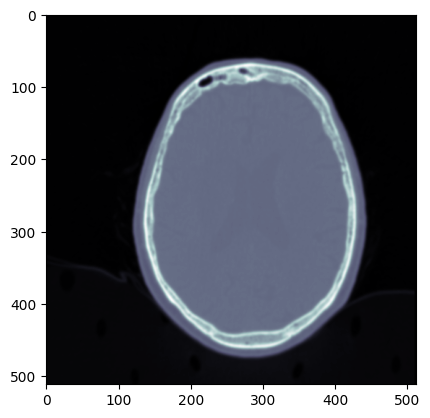

In [8]:
import matplotlib.pyplot as plt

arr = ds.pixel_array
plt.imshow(arr, cmap=plt.cm.bone)

As it is possible to see, the picture information content is still quite poor. The following additional DICOM post-processing should be **sequentially** performed in order to enhance the image content.  

### 1. Color Palette

Some DICOM datasets store their output image pixel values in a lookup table (LUT), where the values in Pixel Data are the index to a corresponding LUT entry. When a dataset’s (0028,0004) Photometric Interpretation value is PALETTE COLOR then the [`apply_color_lut()`](https://pydicom.github.io/pydicom/stable/reference/generated/pydicom.pixel_data_handlers.util.html#pydicom.pixel_data_handlers.util.apply_color_lut) function can be used to apply a palette color LUT to the pixel data to produce an RGB image.

In [9]:
from pydicom.pixel_data_handlers.util import apply_color_lut

try:
    print(f"(0028,0004) Photometric Interpretation: {ds[0x28,0x4].value}")
    rgb = apply_color_lut(arr, ds)
    plt.imshow(rgb, cmap=plt.cm.bone)
except Exception as e:
    print(e)

(0028,0004) Photometric Interpretation: MONOCHROME2
No suitable Palette Color Lookup Table Module found


The *Photometric Interpretation* is *MONOCHROME2*, so no suitable Palette Color Lookup Table Module is found and the `apply_color_lut` method fails.

### 2. Modality LUT or Rescale Operation¶

The DICOM [Modality LUT](http://dicom.nema.org/medical/dicom/current/output/chtml/part03/sect_C.11.html#sect_C.11.1) module converts raw pixel data values to a specific (possibly unitless) physical quantity, such as Hounsfield units for CT. The [`apply_modality_lut()`](https://pydicom.github.io/pydicom/stable/reference/generated/pydicom.pixel_data_handlers.util.html#pydicom.pixel_data_handlers.util.apply_voi_lut) function can be used with an input array of raw values and a dataset containing a Modality LUT module to return the converted values. When a dataset requires multiple grayscale transformations, the Modality LUT transformation is always applied first.

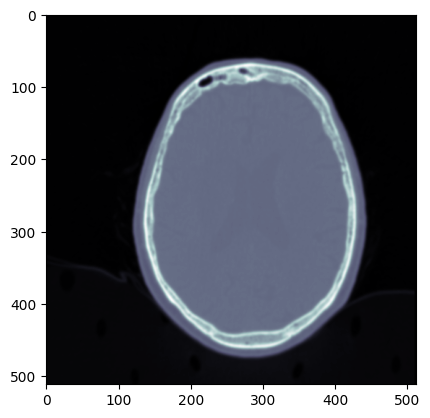

In [10]:
from pydicom.pixel_data_handlers.util import apply_modality_lut

arr = ds.pixel_array
hu = apply_modality_lut(arr, ds)

plt.imshow(hu, cmap=plt.cm.bone)

The image has not visually changed, but the pixel values have been correctly transformed into Hounsfield units.

In [11]:
import numpy as np

np.min(arr), np.max(arr)

(0, 2335)

In [12]:
np.min(hu), np.max(hu)

(-1024.0, 1311.0)

### 3. VOI LUT or Windowing Operation¶

The DICOM [VOI LUT](http://dicom.nema.org/medical/dicom/current/output/chtml/part03/sect_C.11.2.html) module applies a VOI or windowing operation to input values. The [`apply_voi_lut()`](https://pydicom.github.io/pydicom/stable/reference/generated/pydicom.pixel_data_handlers.util.html#pydicom.pixel_data_handlers.util.apply_voi_lut) function can be used with an input array and a dataset containing a VOI LUT module to return values with applied VOI LUT or windowing. When a dataset contains multiple VOI or windowing views then a particular view can be returned by using the index keyword parameter.

When a dataset requires multiple grayscale transformations, then it’s assumed that the modality LUT or rescale operation has already been applied.

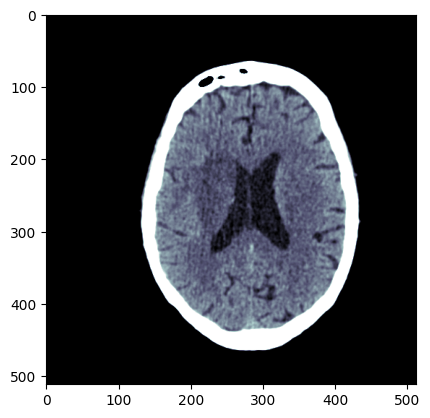

In [13]:
from pydicom.pixel_data_handlers.util import apply_voi_lut

out = apply_voi_lut(hu, ds, index=0)
plt.imshow(out, cmap=plt.cm.bone)

Got it! The sequence of pre-processing steps has deeply enhanced the details of the CT scan contained in the DICOM file. The image can be now definitely visually analyzed. 

## Image export

As just seen, DICOM files contain not only image data, but also lots of ancillary information. it has also been demonstrated the image may not be immediately usable without some processing. It means DICOM images are not accessible without specific viewers and the image exchange is even more difficult since different viewers may differently process them. A possible solution could be to convert the DICOM file into a standard exchange format, e.g., JPEG or PNG.

The starting point is the pre-processed image `out`. The first step is to convert pixel data to `float` in order to avoid overflow or underflow losses during image scaling.

In [14]:
new_image = out.astype(float)

Pixel data is currently expressed in Hounsfield units, but it must rescaled into the `[0, 255]` interval and then converted to 8 bits unsigned integer.

In [15]:
from PIL import Image

scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0
scaled_image = np.uint8(scaled_image)

final_image = Image.fromarray(scaled_image)

The image can then be easily saved in `jpg` or `png` format.

In [16]:
final_image.save('dicom.jpg')
final_image.save('dicom.png')

As a test, it is possible to import and plot the just saved `jpg` image.

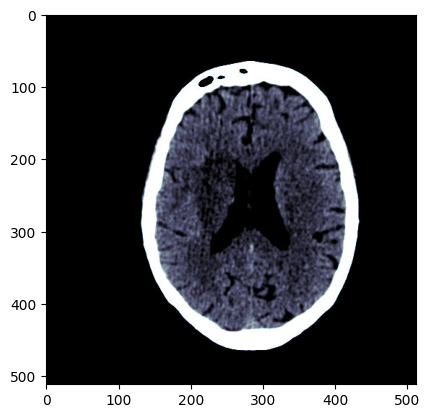

In [17]:
img = np.asarray(Image.open('dicom.jpg'))
plt.imshow(img, cmap=plt.cm.bone)

## DICOM File-sets and DICOMDIR

A File-set is a collection of DICOM files that share a common naming space. Most people have probably interacted with a File-set without being aware of it; one place they’re frequently used is on the CDs/DVDs containing DICOM data that are given to a patient after a medical procedure (such as an MR or ultrasound). The specification for File-sets is given in [Part 10 of the DICOM Standard](http://dicom.nema.org/medical/dicom/current/output/chtml/part10/chapter_8.html). 

Every File-set must contain a single file with the filename **`DICOMDIR`**, the location of which is dependent on the type of media used to store the File-set. For the most commonly used media (DVD, CD, USB, PC file system, etc), the DICOMDIR file will be in the root directory of the File-set. For other media types, [Part 12 of the DICOM Standard](http://dicom.nema.org/medical/dicom/current/output/chtml/part12/ps3.12.html) specifies where the DICOMDIR must be located.

> **_NOTE:_** Despite its name, a DICOMDIR file is not a file system directory and can be read using `dcmread()` like any other DICOM dataset

In [18]:
DICOMDIR_PATH = '/home/user/Desktop/exam/DICOMDIR'
ds = dcmread(DICOMDIR_PATH)
type(ds)

pydicom.dicomdir.DicomDir

The most important element in a DICOMDIR is the (0004,1220) *Directory Record Sequence*: each item in the sequence is a directory record, and one or more records are used to briefly describe an available item, i.e., the so called SOP Instance, and its location within the File-set’s directory structure. Each record has a record type given by the (0004,1430) *Directory Record Type* element, and different records are related to each other using the hierarchy given in [Table F.4-1](https://dicom.nema.org/medical/dicom/current/output/chtml/part03/sect_F.4.html#table_F.4-1). As examples, it is possible to go through some directory records:

In [19]:
# TO BE COMMENTED
ds.DirectoryRecordSequence[0].PatientName = 'ROSSI^MARIO'
ds.DirectoryRecordSequence[0].PatientID = '99999999'
ds.DirectoryRecordSequence[0].PatientBirthDate = '19330101'

In [20]:
print(ds.DirectoryRecordSequence[0])

(0004, 1400) Offset of the Next Directory Record UL: 0
(0004, 1410) Record In-use Flag                  US: 65535
(0004, 1420) Offset of Referenced Lower-Level Di UL: 500
(0004, 1430) Directory Record Type               CS: 'PATIENT'
(0010, 0010) Patient's Name                      PN: 'ROSSI^MARIO'
(0010, 0020) Patient ID                          LO: '99999999'
(0010, 0021) Issuer of Patient ID                LO: 'X1V1_MPI'
(0010, 0030) Patient's Birth Date                DA: '19330101'
(0010, 0040) Patient's Sex                       CS: 'M'


This is a `PATIENT` record which provides details about the patient, such as *Patient's Name* and *Patient ID* (refer to [Table F.5-1](http://dicom.nema.org/medical/dicom/current/output/chtml/part03/sect_F.5.html#table_F.5-1)).

In [21]:
print(ds.DirectoryRecordSequence[1])

(0004, 1400) Offset of the Next Directory Record UL: 0
(0004, 1410) Record In-use Flag                  US: 65535
(0004, 1420) Offset of Referenced Lower-Level Di UL: 956
(0004, 1430) Directory Record Type               CS: 'STUDY'
(0008, 0020) Study Date                          DA: '20221215'
(0008, 0030) Study Time                          TM: '162614'
(0008, 0050) Accession Number                    SH: '5895682501'
(0008, 0061) Modalities in Study                 CS: 'CT'
(0008, 0090) Referring Physician's Name          PN: 'MEDICO^REFERTANTE'
(0008, 1030) Study Description                   LO: 'TC CRANIO (CAPO)'
(0020, 000d) Study Instance UID                  UI: 1.2.840.113564.9.1.2015111110072131.20221209153953.25895682501
(0020, 0010) Study ID                            SH: 'CT20221215162611'
(0020, 1206) Number of Study Related Series      IS: '5'
(0020, 1208) Number of Study Related Instances   IS: '545'
(07a1, 0010) Private Creator                     LO: 'ELSCINT1'
(07a1

This is a `STUDY` record, where details such as acquisition date, time and description are included (refer to [Table F.5-2](https://dicom.nema.org/medical/dicom/current/output/chtml/part03/sect_F.5.2.html)).

In [22]:
print(ds.DirectoryRecordSequence[2])

(0004, 1400) Offset of the Next Directory Record UL: 6032
(0004, 1410) Record In-use Flag                  US: 65535
(0004, 1420) Offset of Referenced Lower-Level Di UL: 1214
(0004, 1430) Directory Record Type               CS: 'SERIES'
(0008, 0021) Series Date                         DA: '20221215'
(0008, 0031) Series Time                         TM: '162644'
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Topogram  0.6  T20s'
(0018, 0015) Body Part Examined                  CS: 'ABDOMEN'
(0018, 1030) Protocol Name                       LO: 'CBM_encefalo_SEQ'
(0020, 000e) Series Instance UID                 UI: 1.3.12.2.1107.5.1.4.55050.30000022121508001632800000005
(0020, 0011) Series Number                       IS: '1'
(0020, 1209) Number of Series Related Instances  IS: '1'


The `SERIES` record adds details such as the acquisition modality, i.e., `CT`, and the examined body part, i.e., `ABDOMEN` (refer to [Table F.5-3](https://dicom.nema.org/medical/dicom/current/output/chtml/part03/sect_F.5.3.html)).

In [23]:
print(ds.DirectoryRecordSequence[3])

(0004, 1400) Offset of the Next Directory Record UL: 0
(0004, 1410) Record In-use Flag                  US: 65535
(0004, 1420) Offset of Referenced Lower-Level Di UL: 0
(0004, 1430) Directory Record Type               CS: 'IMAGE'
(0004, 1500) Referenced File ID                  CS: ['MD44PKO2', 'OBGUOM0I', 'I1000000']
(0004, 1510) Referenced SOP Class UID in File    UI: CT Image Storage
(0004, 1511) Referenced SOP Instance UID in File UI: 1.3.12.2.1107.5.1.4.55050.30000022121506293760900002194
(0004, 1512) Referenced Transfer Syntax UID in F UI: Explicit VR Little Endian
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'LOCALIZER', 'CT_SOM5 TOP']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.4.55050.30000022121506293760900002194
(0008, 0023) Content Date                        DA: '20221215'
(0008, 0033) Content Time                        TM: '162704.453698'
(0008

Last but not least, the `IMAGE` record contains all the image data, i.e., `Pixel Data`, and metadata, e.g., `Bits Allocated`, `Photometric Interpretation`.

While it’s possible to access everything within a File-set using the DICOMDIR dataset, making changes to an existing File-set quickly becomes complicated due to the need to add and remove directory records, recalculate the byte offsets for existing records and manage the corresponding file system changes. A more user-friendly way to interact with one is via the [FileSet](https://pydicom.github.io/pydicom/stable/reference/generated/pydicom.fileset.FileSet.html#pydicom.fileset.FileSet) class.

In [24]:
from pydicom.fileset import FileSet

fs = FileSet(ds)
type(fs)

pydicom.fileset.FileSet

An overview of the File-set’s contents is shown when printing:

In [25]:
print(fs)

DICOM File-set
  Root directory: /home/user/Desktop/exam
  File-set ID: (no value available)
  File-set UID: 1.2.840.113704.7.1.0.12118132138452.1672763590.1000003
  Descriptor file ID: (no value available)
  Descriptor file character set: (no value available)
  Changes staged for write(): DICOMDIR update, directory structure update

  Managed instances:
    PATIENT: PatientID='99999999', PatientName='ROSSI^MARIO'
      STUDY: StudyDate=20221215, StudyTime=162614, StudyDescription='TC CRANIO (CAPO)'
        SERIES: Modality=CT, SeriesNumber=1
          IMAGE: 1 SOP Instance
        SERIES: Modality=CT, SeriesNumber=2
          IMAGE: 66 SOP Instances
        SERIES: Modality=CT, SeriesNumber=602
          IMAGE: 199 SOP Instances
        SERIES: Modality=CT, SeriesNumber=603
          IMAGE: 143 SOP Instances
        SERIES: Modality=CT, SeriesNumber=604
          IMAGE: 136 SOP Instances


which basically provides a brief summary of the directory records just introduced.

## Conclusions

This post has provided a wide overview about DICOM images in Python in relation to:

- Data structure
- Image visualization (and pre-processing)
- Image export
- DICOM File-sets and DICOMDIR

The following script summarizes all these concepts since it allows to read a `DICOMDIR` file (via the `DICOMDIR_PATH` variable) and converts all the SOP instances to JPEG images. The images will be exported following the directory structure `{OUTPUT_PATH}/{patient_id}/{study_date}/{series_number}/{instance_number}.jpg`. 

In [26]:
import os
from PIL import Image
import numpy as np
from pydicom import dcmread
from pydicom.fileset import FileSet
from pydicom.pixel_data_handlers.util import apply_color_lut, apply_modality_lut, apply_voi_lut


DICOMDIR_PATH = '/home/user/Desktop/exam/DICOMDIR'
OUTPUT_PATH = '/home/user/Desktop/exam_converted'

# DICOMDIR reading
ds = dcmread(DICOMDIR_PATH)
fs = FileSet(ds)

# Iterating over the FileSet instances
for instance in fs:
    # Loading the corresponding SOP Instance dataset
    ds = instance.load()

    # Getting instance metadata to categorize images
    patient_id = ds.PatientID
    study_date = ds.StudyDate
    series_number = ds.SeriesNumber
    instance_number = ds.InstanceNumber

    # Getting instance pixel data
    arr = ds.pixel_array

    # Applying color palette (if available)
    try:
        arr = apply_color_lut(arr, ds)
    except Exception as e:
        pass

    # Applying modality LUT
    hu = apply_modality_lut(arr, ds)

    # Applying VOI LUT
    out = apply_voi_lut(hu, ds, index=0)

    # Rescaling pixel data
    new_image = out.astype(float)
    scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0
    scaled_image = np.uint8(scaled_image)
    final_image = Image.fromarray(scaled_image)

    # Exporting image in JPEG format
    IMAGE_PATH = f"{OUTPUT_PATH}{os.sep}{patient_id}{os.sep}{study_date}{os.sep}{series_number}"
    os.makedirs(IMAGE_PATH, exist_ok=True)
    OUTPUT_IMAGE = f"{IMAGE_PATH}{os.sep}{instance_number}.jpg"
    final_image.save(OUTPUT_IMAGE)

## References

- [Digital Image and Communications in Medicine](https://www.dicomstandard.org/)
- [pydicom documentation](https://pydicom.github.io/pydicom/stable/)
- [Extract DICOM Images Only for Deep Learning | by Nawaf Alageel | Analytics Vidhya | Medium](https://medium.com/analytics-vidhya/dicom-and-deep-learning-63373e99d79a)
- [How to read DICOM files into Python | MICHELE SCIPIONI (mscipio.github.io)](https://mscipio.github.io/post/read_dicom_files_in_python/)
- [How To Convert a DICOM Image Into JPG or PNG - PYCAD](https://pycad.co/how-to-convert-a-dicom-image-into-jpg-or-png/)